### **Projek Analisis Data persewaan sepeda**

pertanyaaan
1. Jam berapa yang paling sibuk untuk penyewaan sepeda?
2. Apakah ada perbedaan jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

import library yang digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Membaca dataset yang telah di upload

In [ ]:
hourly_data = pd.read_csv('hour.csv')
daily_data = pd.read_csv('day.csv')

Membaca Dataset Teratas

In [ ]:
print(hourly_data.head())
print(daily_data.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01   

Memvisualisasi Jam dan menghitung rata-rata jumlah penyewaan sepeda

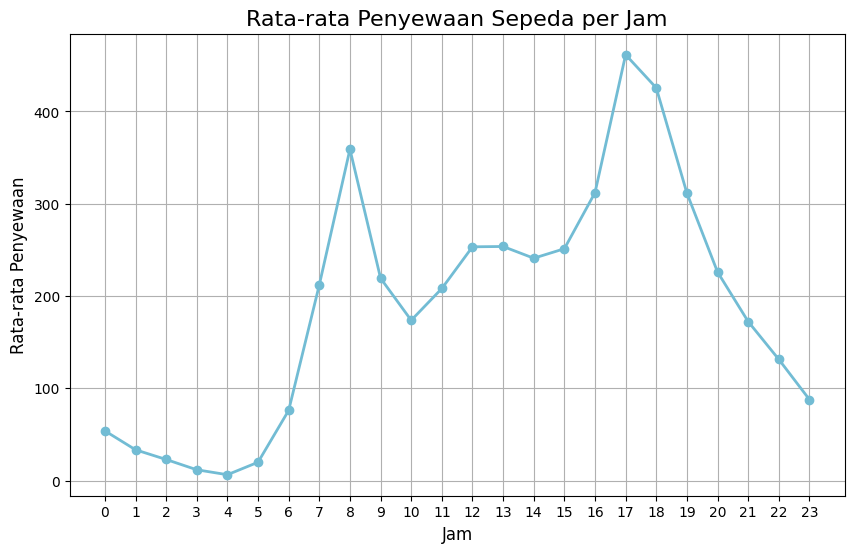

In [ ]:
hourly_avg_df = hourly_data.groupby('hr').agg({
    "cnt": "mean"
}).reset_index()
hourly_avg_df.rename(columns={"cnt": "avg_rentals"}, inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(hourly_avg_df["hr"], hourly_avg_df["avg_rentals"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Rata-rata Penyewaan Sepeda per Jam", loc="center", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.xticks(range(0, 24))
plt.grid()
plt.show()

Memvisualisasikan jam tersibuk untuk penyewaan sepeda

<ipython-input-31-16604256e4b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


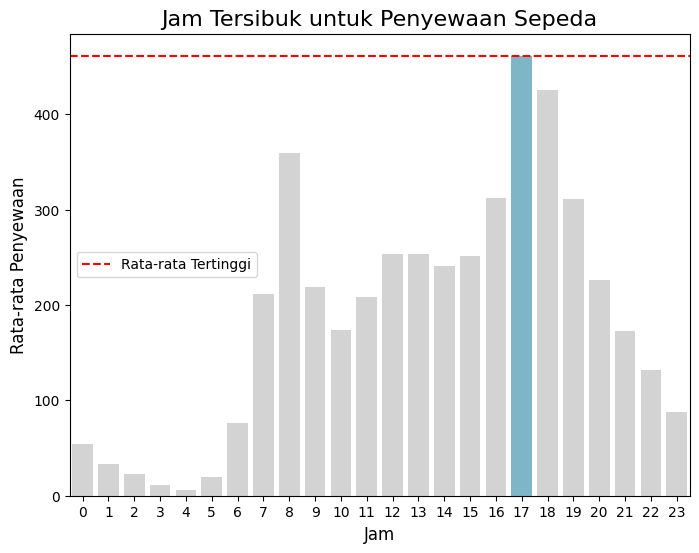

Jam paling sibuk untuk penyewaan sepeda adalah pukul 17:00 dengan rata-rata 461.45 penyewaan.


In [ ]:
plt.figure(figsize=(8, 6))
colors = ["#D3D3D3" if hr != busiest_hour['hr'] else "#72BCD4" for hr in hourly_avg_df["hr"]]
sns.barplot(
    x=hourly_avg_df["hr"],
    y=hourly_avg_df["avg_rentals"],
    palette=colors
)
plt.title("Jam Tersibuk untuk Penyewaan Sepeda", fontsize=16)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Rata-rata Penyewaan", fontsize=12)
plt.axhline(busiest_hour['avg_rentals'], color='red', linestyle='--', label='Rata-rata Tertinggi')
plt.legend()
plt.show()

busiest_hour = hourly_avg_df.loc[hourly_avg_df["avg_rentals"].idxmax()]
print(f"Jam paling sibuk untuk penyewaan sepeda adalah pukul {int(busiest_hour['hr'])}:00 dengan rata-rata {busiest_hour['avg_rentals']:.2f} penyewaan.")


Perbandingan Total penyewaan hari kerja dan akhir pekan

<ipython-input-25-fdd60910a3c6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


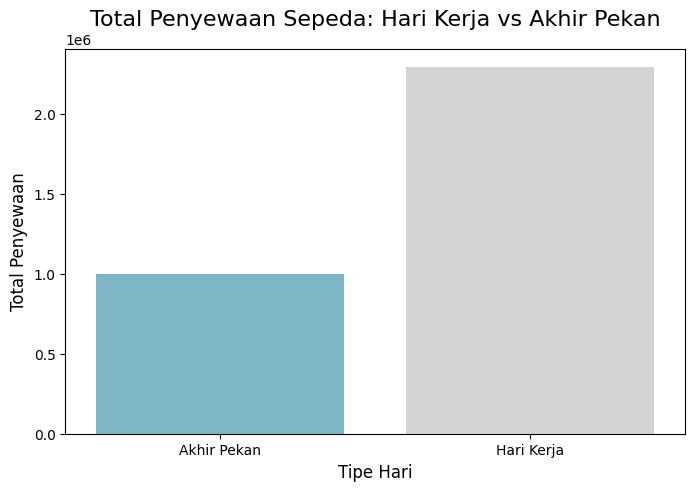

In [ ]:
hourly_data['day_type'] = hourly_data['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

day_type_df = hourly_data.groupby("day_type").agg({
    "cnt": "sum"
}).reset_index()
day_type_df.rename(columns={"cnt": "total_rentals"}, inplace=True)

plt.figure(figsize=(8, 5))
colors = ["#72BCD4", "#D3D3D3"]
sns.barplot(
    x="day_type",
    y="total_rentals",
    data=day_type_df,
    palette=colors
)
plt.title("Total Penyewaan Sepeda: Hari Kerja vs Akhir Pekan", loc="center", fontsize=16)
plt.xlabel("Tipe Hari", fontsize=12)
plt.ylabel("Total Penyewaan", fontsize=12)
plt.show()

Menghitung persentase kontribusi penyewaan sepeda pada hari kerja dan akhir pekan terhadap total penyewaan sepeda

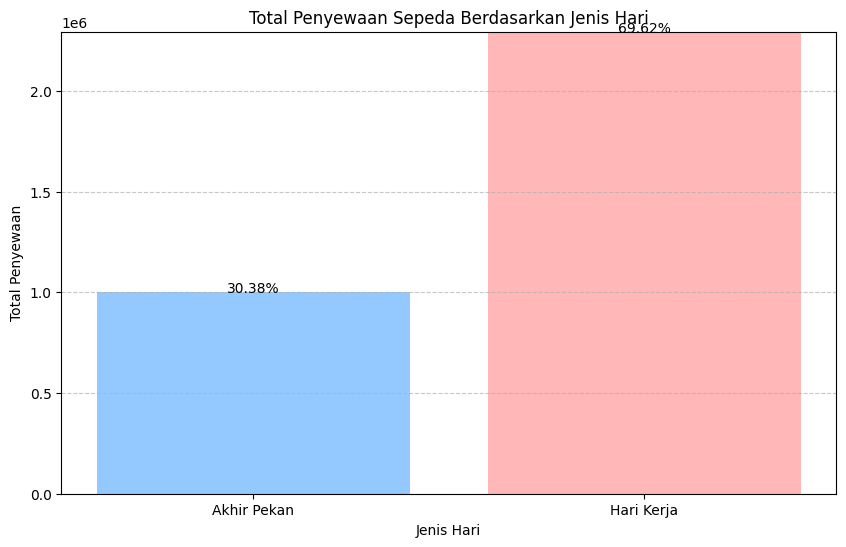

Akhir Pekan: 1000269 penyewaan (30.38%)
Hari Kerja: 2292410 penyewaan (69.62%)


In [ ]:
plt.figure(figsize=(10, 6))

plt.bar(day_type_df['day_type'], day_type_df['total_rentals'], color=['#66b3ff', '#ff9999'], alpha=0.7)

plt.xlabel('Jenis Hari')
plt.ylabel('Total Penyewaan')
plt.title('Total Penyewaan Sepeda Berdasarkan Jenis Hari')

for index, row in day_type_df.iterrows():
    plt.text(index, row['total_rentals'] + 100, f"{row['percentage']:.2f}%", ha='center')

plt.ylim(0, day_type_df['total_rentals'].max() + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

day_type_df["percentage"] = (day_type_df["total_rentals"] / day_type_df["total_rentals"].sum()) * 100
for index, row in day_type_df.iterrows():
    print(f"{row['day_type']}: {row['total_rentals']} penyewaan ({row['percentage']:.2f}%)")

## Kesimpulan

Jadi jam yang paling sibuk untuk penyewaan sepeda adalah pukul 17:00 dengan rata-rata 461.45 penyewaan dan perbedaan penyewaan akhhir pekan dan hari kerja adalah Akhir Pekan: 1000269 penyewaan (30.38%)
Hari Kerja: 2292410 penyewaan (69.62%)